<a href="https://colab.research.google.com/github/sameersahu473/Shastra/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
! pip install kaggle

# New Section

In [154]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [155]:
! cp kaggle.json ~/.kaggle/

In [156]:
! chmod 600 ~/.kaggle/kaggle.json

In [157]:
! kaggle competitions download kick-off

FIFA_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
FIFA_test.csv: Skipping, found more recently modified local copy (use --force to force download)
FIFA_test_player_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [158]:
! unzip FIFA_test_player_data.csv.zip

Archive:  FIFA_test_player_data.csv.zip
replace FIFA_test_player_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FIFA_test_player_data.csv  


In [159]:
! unzip FIFA_train.csv.zip

Archive:  FIFA_train.csv.zip
replace FIFA_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FIFA_train.csv          


In [160]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
df = pd.read_csv('FIFA_train.csv')
df_test = pd.read_csv('FIFA_test_player_data.csv')

In [162]:
df.shape

(37548, 103)

In [163]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,216393,https://sofifa.com/player/216393/youri-tielema...,Y. Tielemans,Youri Tielemans,21,1997-05-07,176,72,Belgium,AS Monaco,79,89,20000000,"CM, CDM",Right,2,5,4,Medium/Medium,Normal,Yes,42000000.0,#Distance Shooter,RDM,8.0,NaN,2017-07-01,2022.0,SUB,17.0,53.0,79.0,80.0,77.0,68.0,70.0,NaN,NaN,NaN,NaN,...,70,71,74,83,76,81,66,72,69,6,8,10,14,12,73+2,73+2,73+2,74+2,75+2,75+2,75+2,74+2,76+2,76+2,76+2,74+2,78+2,78+2,78+2,74+2,71+2,74+2,74+2,74+2,71+2,69+2,69+2,69+2,69+2,69+2
1,187878,https://sofifa.com/player/187878/lukas-marecek...,L. Mareček,Lukáš Mareček,28,1990-04-17,183,79,Czech Republic,Sporting Lokeren,71,71,2400000,"CM, CDM, CAM",Right,1,3,3,Medium/Medium,Lean,No,3500000.0,NaN,LDM,23.0,NaN,2018-01-29,2021.0,NaN,NaN,70.0,57.0,70.0,69.0,69.0,71.0,NaN,NaN,NaN,NaN,...,72-4,70-5,57,72,55,68-2,69,72-1,68-2,8,9,11,14,9,63+2,63+2,63+2,66+2,65+2,65+2,65+2,66+2,67+2,67+2,67+2,68+2,69+2,69+2,69+2,68+2,71+2,71+2,71+2,71+2,71+2,70+2,68+2,68+2,68+2,70+2
2,178628,https://sofifa.com/player/178628/fernando-fore...,F. Forestieri,Fernando Martín Forestieri,29,1990-01-15,172,67,Italy,Sheffield Wednesday,73,73,4000000,"ST, CAM",Right,1,3,4,High/Medium,Normal,No,7600000.0,#Acrobat,SUB,45.0,NaN,2015-08-29,2021.0,NaN,NaN,78.0,73.0,68.0,79.0,48.0,67.0,NaN,NaN,NaN,NaN,...,73,42,70,73,67,71,50,53,31,6,6,7,12,8,71+2,71+2,71+2,74+2,73+2,73+2,73+2,74+2,73+2,73+2,73+2,72+2,68+2,68+2,68+2,72+2,60+2,60+2,60+2,60+2,60+2,58+2,56+2,56+2,56+2,58+2
3,184341,https://sofifa.com/player/184341/riccardo-mani...,R. Maniero,Riccardo Maniero,31,1987-11-26,183,75,Italy,Pescara,69,69,950000,ST,Right,1,3,2,High/Low,Normal,No,1500000.0,NaN,ST,19.0,NaN,2019-07-18,2022.0,NaN,NaN,52.0,70.0,54.0,63.0,32.0,71.0,NaN,NaN,NaN,NaN,...,52,20,73,55,72,66,45,18,13,8,11,9,9,12,67+2,67+2,67+2,61+2,64+2,64+2,64+2,61+2,62+2,62+2,62+2,59+2,57+2,57+2,57+2,59+2,43+2,46+2,46+2,46+2,43+2,41+2,44+2,44+2,44+2,41+2
4,231933,https://sofifa.com/player/231933/rowllin-borge...,R. Borges,Rowllin Borges,25,1992-06-05,185,75,India,India,58,64,0,CDM,Right,1,3,2,Medium/Medium,Lean,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LDM,14.0,57.0,35.0,49.0,50.0,57.0,64.0,NaN,NaN,NaN,NaN,...,55,58,39,47,40,40,58,56,57,10,7,6,5,6,47+1,47+1,47+1,48+1,48+1,48+1,48+1,48+1,49+1,49+1,49+1,50+1,52+1,52+1,52+1,50+1,56+1,57+1,57+1,57+1,56+1,57+1,58+1,58+1,58+1,57+1


In [164]:
df_test.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,92,92,GK,Right,5,4,1,Medium/Medium,Normal,Yes,100700000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,90.0,95.0,89.0,60.0,...,29,30,12,70,47,70,10,10,11,91+2,90,95,91,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,31,1986-03-30,183,75,Spain,Real Madrid,90,90,CB,Right,4,3,3,High/Medium,Normal,Yes,106600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,LCB,15.0,76.0,63.0,71.0,71.0,88.0,83.0,NaN,NaN,NaN,NaN,NaN,...,84,88,52,63,68,80+4,86+1,89,91+1,11,8,9,7,11,72+3,72+3,72+3,70+3,70+3,70+3,70+3,70+3,70+3,70+3,70+3,72+3,75+3,75+3,75+3,72+3,82+3,83+3,83+3,83+3,82+3,84+3,87+3,87+3,87+3,84+3
2,182521,https://sofifa.com/player/182521/toni-kroos/18...,T. Kroos,Toni Kroos,27,1990-01-04,182,78,Germany,Real Madrid,90,90,"CM, CDM",Right,4,5,3,Medium/Medium,Normal,Yes,162000000.0,"#Playmaker , #Distance Shooter",LCM,8.0,NaN,2014-07-17,2022.0,LDM,8.0,56.0,81.0,89.0,81.0,73.0,70.0,NaN,NaN,NaN,NaN,NaN,...,60,85+8,79+3,88,73,85,63,82+7,69+4,10,11,13,7,10,77+3,77+3,77+3,80+3,81+3,81+3,81+3,80+3,84+3,84+3,84+3,81+3,87+3,87+3,87+3,81+3,79+3,82+3,82+3,82+3,79+3,76+3,73+3,73+3,73+3,76+3
3,138956,https://sofifa.com/player/138956/giorgio-chiel...,G. Chiellini,Giorgio Chiellini,32,1984-08-14,187,85,Italy,Juventus,89,89,CB,Left,4,2,2,Low/High,Normal,Yes,62700000.0,"#Tackling , #Tactician , #Strength, #Complete ...",LCB,3.0,NaN,2005-07-01,2018.0,LCB,3.0,74.0,46.0,56.0,59.0,90.0,85.0,NaN,NaN,NaN,NaN,NaN,...,92+2,88,28,50,50,82+4,92,92,90,3,3,2,4,3,59+3,59+3,59+3,56+3,56+3,56+3,56+3,56+3,55+3,55+3,55+3,58+3,61+3,61+3,61+3,58+3,75+3,77+3,77+3,77+3,75+3,79+3,87+3,87+3,87+3,79+3
4,9014,https://sofifa.com/player/9014/arjen-robben/18...,A. Robben,Arjen Robben,33,1984-01-23,180,80,Netherlands,FC Bayern München,88,88,"RM, RW",Left,4,2,4,High/Low,Normal,Yes,59400000.0,"#Dribbler, #Distance Shooter, #Acrobat",SUB,10.0,NaN,2009-08-28,2018.0,RW,11.0,86.0,86.0,81.0,91.0,32.0,63.0,NaN,NaN,NaN,NaN,NaN,...,47,39,85,83,80,86,29,26,26,10,8,11,5,15,83+3,83+3,83+3,87+3,87+3,87+3,87+3,87+3,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,59+3,59+3,59+3,63+3,58+3,47+3,47+3,47+3,58+3


In [165]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,37548.000000,37548.000000,37548.000000,37548.000000,37548.000000,37548.000000,3.754800e+04,37548.000000,37548.000000,37548.000000,3.452800e+04,37046.000000,37046.000000,2401.000000,33356.000000,33356.000000,33356.000000,33356.00000,33356.000000,33356.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,213684.446895,25.213726,181.300842,75.290908,66.290828,71.430382,2.467933e+06,1.117423,2.946948,2.347022,4.695537e+06,19.923366,2020.155428,12.092045,67.886047,52.368749,57.154035,62.35319,51.302494,64.945647,65.337309,62.945849,61.624284,66.283397,38.595420,63.188216
std,30601.734513,4.655781,6.718944,7.024779,6.993904,6.128343,5.646339e+06,0.399526,0.663197,0.754569,1.120486e+07,16.398726,1.531467,6.848134,11.279122,14.023351,10.586776,10.45689,16.766580,9.770087,7.786293,7.561199,7.673535,8.222266,10.460477,8.631960
min,164.000000,16.000000,154.000000,49.000000,46.000000,46.000000,0.000000e+00,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2017.000000,1.000000,23.000000,14.000000,24.000000,23.00000,15.000000,27.000000,39.000000,43.000000,35.000000,37.000000,12.000000,38.000000
25%,199510.750000,21.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1.000000,3.000000,2.000000,5.380000e+05,8.000000,2019.000000,6.000000,62.000000,42.000000,50.000000,57.00000,36.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,58.000000
50%,221168.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2020.000000,12.000000,69.000000,55.000000,58.000000,64.00000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,40.000000,64.000000
75%,235896.250000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,1.000000,3.000000,3.000000,3.700000e+06,27.000000,2021.000000,18.000000,76.000000,63.000000,64.000000,69.00000,65.000000,72.000000,70.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,252905.000000,47.000000,205.000000,110.000000,94.000000,95.000000,1.230000e+08,5.000000,5.000000,5.000000,2.368000e+08,99.000000,2026.000000,87.000000,96.000000,93.000000,92.000000,96.00000,91.000000,92.000000,91.000000,92.000000,93.000000,92.000000,65.000000,91.000000


In [166]:
for i in range(len(df.columns)):
    print(i+1, ": ", df.columns[i])

1 :  sofifa_id
2 :  player_url
3 :  short_name
4 :  long_name
5 :  age
6 :  dob
7 :  height_cm
8 :  weight_kg
9 :  nationality
10 :  club
11 :  overall
12 :  potential
13 :  value
14 :  player_positions
15 :  preferred_foot
16 :  international_reputation
17 :  weak_foot
18 :  skill_moves
19 :  work_rate
20 :  body_type
21 :  real_face
22 :  release_clause_eur
23 :  player_tags
24 :  team_position
25 :  team_jersey_number
26 :  loaned_from
27 :  joined
28 :  contract_valid_until
29 :  nation_position
30 :  nation_jersey_number
31 :  pace
32 :  shooting
33 :  passing
34 :  dribbling
35 :  defending
36 :  physic
37 :  gk_diving
38 :  gk_handling
39 :  gk_kicking
40 :  gk_reflexes
41 :  gk_speed
42 :  gk_positioning
43 :  player_traits
44 :  attacking_crossing
45 :  attacking_finishing
46 :  attacking_heading_accuracy
47 :  attacking_short_passing
48 :  attacking_volleys
49 :  skill_dribbling
50 :  skill_curve
51 :  skill_fk_accuracy
52 :  skill_long_passing
53 :  skill_ball_control
54 :  

In [167]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            4192
lcb           4192
cb            4192
rcb           4192
rb            4192
Length: 103, dtype: int64

In [168]:
for col in df.columns:  
    dataTypeSeries = df[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of sofifa_id column of Dataframe :
int64
Data type of player_url column of Dataframe :
object
Data type of short_name column of Dataframe :
object
Data type of long_name column of Dataframe :
object
Data type of age column of Dataframe :
int64
Data type of dob column of Dataframe :
object
Data type of height_cm column of Dataframe :
int64
Data type of weight_kg column of Dataframe :
int64
Data type of nationality column of Dataframe :
object
Data type of club column of Dataframe :
object
Data type of overall column of Dataframe :
int64
Data type of potential column of Dataframe :
int64
Data type of value column of Dataframe :
int64
Data type of player_positions column of Dataframe :
object
Data type of preferred_foot column of Dataframe :
object
Data type of international_reputation column of Dataframe :
int64
Data type of weak_foot column of Dataframe :
int64
Data type of skill_moves column of Dataframe :
int64
Data type of work_rate column of Dataframe :
object
Data type of

In [169]:
index_no = df.columns.get_loc('mentality_positioning')
index_no

65

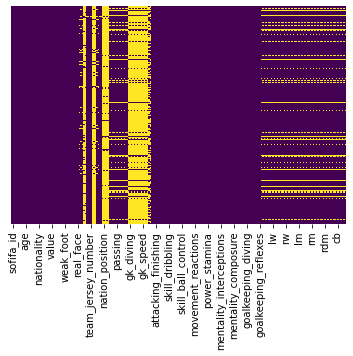

In [170]:
sns.heatmap(df.isnull(),yticklabels= False,cbar =False,cmap ='viridis')

In [171]:
df_test.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            1809
lcb           1809
cb            1809
rcb           1809
rb            1809
Length: 102, dtype: int64

In [172]:
index_no = df.columns.get_loc('attacking_crossing')
index_no

43

In [173]:
colseries = df.columns[43:]

In [174]:
colseries

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 

In [175]:
def transform(str):
  if len(str)== 0 :
     return 0
  
  else:
    if len(str) ==3:
      return int(str[0:1])
    else:
     return int(str[0:2])

     

In [176]:
def convert_attributes(number_str):
  if type(number_str) == str:
    if '+' in number_str:
      return float(number_str.split('+')[0])
    elif '-' in number_str:
      return float(number_str.split('-')[0])
    else:
      return float(number_str)

In [177]:
#df[colseries] = df[colseries].apply(transform)
#df[colseries] = transform(df[colseries])

for cols in colseries:
  df[cols] = df[cols].apply(convert_attributes)


for cols in colseries:
  df[cols].replace(np.nan,0)

In [178]:
delcols = ['sofifa_id','player_url','short_name','long_name','dob','nation_jersey_number']

df =df.drop(delcols, axis=1)

In [179]:
df['mentality_positioning'].dtypes

dtype('float64')

In [180]:
df.head(15)

,age,height_cm,weight_kg,nationality,club,overall,potential,value,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,21,176,72,Belgium,AS Monaco,79,89,20000000,"CM, CDM",Right,2,5,4,Medium/Medium,Normal,Yes,42000000.0,#Distance Shooter,RDM,8.0,NaN,2017-07-01,2022.0,SUB,53.0,79.0,80.0,77.0,68.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Passer (CPU AI Only), Long Shot Taker (CP...",76.0,73.0,57.0,...,70.0,71.0,74.0,83.0,76.0,81.0,66.0,72.0,69.0,6.0,8.0,10.0,14.0,12.0,73.0,73.0,73.0,74.0,75.0,75.0,75.0,74.0,76.0,76.0,76.0,74.0,78.0,78.0,78.0,74.0,71.0,74.0,74.0,74.0,71.0,69.0,69.0,69.0,69.0,69.0
1,28,183,79,Czech Republic,Sporting Lokeren,71,71,2400000,"CM, CDM, CAM",Right,1,3,3,Medium/Medium,Lean,No,3500000.0,NaN,LDM,23.0,NaN,2018-01-29,2021.0,NaN,70.0,57.0,70.0,69.0,69.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Early Crosser",68.0,48.0,60.0,...,72.0,70.0,57.0,72.0,55.0,68.0,69.0,72.0,68.0,8.0,9.0,11.0,14.0,9.0,63.0,63.0,63.0,66.0,65.0,65.0,65.0,66.0,67.0,67.0,67.0,68.0,69.0,69.0,69.0,68.0,71.0,71.0,71.0,71.0,71.0,70.0,68.0,68.0,68.0,70.0
2,29,172,67,Italy,Sheffield Wednesday,73,73,4000000,"ST, CAM",Right,1,3,4,High/Medium,Normal,No,7600000.0,#Acrobat,SUB,45.0,NaN,2015-08-29,2021.0,NaN,78.0,73.0,68.0,79.0,48.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Argues with Officials, Crowd Favourit...",64.0,73.0,59.0,...,73.0,42.0,70.0,73.0,67.0,71.0,50.0,53.0,31.0,6.0,6.0,7.0,12.0,8.0,71.0,71.0,71.0,74.0,73.0,73.0,73.0,74.0,73.0,73.0,73.0,72.0,68.0,68.0,68.0,72.0,60.0,60.0,60.0,60.0,60.0,58.0,56.0,56.0,56.0,58.0
3,31,183,75,Italy,Pescara,69,69,950000,ST,Right,1,3,2,High/Low,Normal,No,1500000.0,NaN,ST,19.0,NaN,2019-07-18,2022.0,NaN,52.0,70.0,54.0,63.0,32.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,72.0,73.0,...,52.0,20.0,73.0,55.0,72.0,66.0,45.0,18.0,13.0,8.0,11.0,9.0,9.0,12.0,67.0,67.0,67.0,61.0,64.0,64.0,64.0,61.0,62.0,62.0,62.0,59.0,57.0,57.0,57.0,59.0,43.0,46.0,46.0,46.0,43.0,41.0,44.0,44.0,44.0,41.0
4,25,185,75,India,India,58,64,0,CDM,Right,1,3,2,Medium/Medium,Lean,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LDM,57.0,35.0,49.0,50.0,57.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,33.0,55.0,...,55.0,58.0,39.0,47.0,40.0,40.0,58.0,56.0,57.0,10.0,7.0,6.0,5.0,6.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,48.0,49.0,49.0,49.0,50.0,52.0,52.0,52.0,50.0,56.0,57.0,57.0,57.0,56.0,57.0,58.0,58.0,58.0,57.0
5,26,183,75,Japan,Hokkaido Consadole Sapporo,67,70,850000,"CB, LB, CM",Left,1,3,2,Medium/High,Normal,No,1100000.0,NaN,LCB,5.0,NaN,2017-01-07,2022.0,NaN,64.0,63.0,68.0,56.0,66.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,63.0,53.0,...,52.0,64.0,42.0,62.0,62.0,65.0,69.0,70.0,65.0,13.0,10.0,8.0,7.0,5.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,61.0,61.0,61.0,61.0,64.0,64.0,64.0,61.0,66.0,67.0,67.0,67.0,66.0,66.0,65.0,65.0,65.0,66.0
6,38,191,93,England,Chelsea,72,72,210000,GK,Right,2,3,1,Medium/Medium,Normal,Yes,389000.0,NaN,RES,31.0,NaN,2018-07-26,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,70.0,60.0,74.0,38.0,72.0,NaN,19.0,12.0,15.0,...,26.0,20.0,13.0,58.0,21.0,49.0,14.0,12.0,11.0,73.0,70.0,60.0,72.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,190,81,Spain,CD Numancia,62,70,450000,ST,Right,1,3,2,Medium/Medium,Lean,No,810000.0,NaN,RES,20.0,NaN,2018-07-02,2021.

In [181]:
for cols in df.columns:

  print(cols + df[cols].isnull().sum())

TypeError: ignored

In [182]:
cat_col = [c for i, c in enumerate(df.columns) if df.dtypes[i] in [np.object]]
cat_col

['nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'team_position',
 'loaned_from',
 'joined',
 'nation_position',
 'player_traits']

In [196]:
df['player_traits'].value_counts()

Injury Prone                                                                                                                        632
Speed Dribbler (CPU AI Only)                                                                                                        577
Early Crosser                                                                                                                       532
Long Passer (CPU AI Only)                                                                                                           508
Dives Into Tackles (CPU AI Only)                                                                                                    450
                                                                                                                                   ... 
Dives Into Tackles (CPU AI Only), Backs Into Player                                                                                   1
Diver, Flair, Long Shot Taker (CPU AI Only), Pla

In [197]:
catcol = ['nationality','club','preferred_foot','work_rate','body_type','real_face','player_tags','team_position','loaned_from','nation_position']

In [201]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder= preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
#df['species']= label_encoder.fit_transform(df['species'])
for col in catcol:
  df[col]= label_encoder.fit_transform(df[col])

In [202]:
df.head(15)

,age,height_cm,weight_kg,nationality,club,overall,potential,value,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,21,176,72,13,18,79,89,20000000,"CM, CDM",1,2,5,4,8,6,1,42000000.0,14,20,8.0,435,2017-07-01,2022.0,27,53.0,79.0,80.0,77.0,68.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Passer (CPU AI Only), Long Shot Taker (CP...",76.0,73.0,57.0,...,70.0,71.0,74.0,83.0,76.0,81.0,66.0,72.0,69.0,6.0,8.0,10.0,14.0,12.0,73.0,73.0,73.0,74.0,75.0,75.0,75.0,74.0,76.0,76.0,76.0,74.0,78.0,78.0,78.0,74.0,71.0,74.0,74.0,74.0,71.0,69.0,69.0,69.0,69.0,39
1,28,183,79,39,703,71,71,2400000,"CM, CDM, CAM",1,1,3,3,8,3,0,3500000.0,109,10,23.0,435,2018-01-29,2021.0,28,70.0,57.0,70.0,69.0,69.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Early Crosser",68.0,48.0,60.0,...,72.0,70.0,57.0,72.0,55.0,68.0,69.0,72.0,68.0,8.0,9.0,11.0,14.0,9.0,63.0,63.0,63.0,66.0,65.0,65.0,65.0,66.0,67.0,67.0,67.0,68.0,69.0,69.0,69.0,68.0,71.0,71.0,71.0,71.0,71.0,70.0,68.0,68.0,68.0,40
2,29,172,67,78,680,73,73,4000000,"ST, CAM",1,1,3,4,2,6,0,7600000.0,0,28,45.0,435,2015-08-29,2021.0,28,78.0,73.0,68.0,79.0,48.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Argues with Officials, Crowd Favourit...",64.0,73.0,59.0,...,73.0,42.0,70.0,73.0,67.0,71.0,50.0,53.0,31.0,6.0,6.0,7.0,12.0,8.0,71.0,71.0,71.0,74.0,73.0,73.0,73.0,74.0,73.0,73.0,73.0,72.0,68.0,68.0,68.0,72.0,60.0,60.0,60.0,60.0,60.0,58.0,56.0,56.0,56.0,28
3,31,183,75,78,558,69,69,950000,ST,1,1,3,2,1,6,0,1500000.0,109,27,19.0,435,2019-07-18,2022.0,28,52.0,70.0,54.0,63.0,32.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,72.0,73.0,...,52.0,20.0,73.0,55.0,72.0,66.0,45.0,18.0,13.0,8.0,11.0,9.0,9.0,12.0,67.0,67.0,67.0,61.0,64.0,64.0,64.0,61.0,62.0,62.0,62.0,59.0,57.0,57.0,57.0,59.0,43.0,46.0,46.0,46.0,43.0,41.0,44.0,44.0,44.0,11
4,25,185,75,73,409,58,64,0,CDM,1,1,3,2,8,3,0,NaN,109,29,NaN,435,NaN,NaN,10,57.0,35.0,49.0,50.0,57.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,33.0,55.0,...,55.0,58.0,39.0,47.0,40.0,40.0,58.0,56.0,57.0,10.0,7.0,6.0,5.0,6.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,48.0,49.0,49.0,49.0,50.0,52.0,52.0,52.0,50.0,56.0,57.0,57.0,57.0,56.0,57.0,58.0,58.0,58.0,27
5,26,183,75,81,392,67,70,850000,"CB, LB, CM",0,1,3,2,6,6,0,1100000.0,109,8,5.0,435,2017-01-07,2022.0,28,64.0,63.0,68.0,56.0,66.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,63.0,53.0,...,52.0,64.0,42.0,62.0,62.0,65.0,69.0,70.0,65.0,13.0,10.0,8.0,7.0,5.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,61.0,61.0,61.0,61.0,64.0,64.0,64.0,61.0,66.0,67.0,67.0,67.0,66.0,66.0,65.0,65.0,65.0,36
6,38,191,93,46,169,72,72,210000,GK,1,2,3,1,8,6,1,389000.0,109,21,31.0,435,2018-07-26,2019.0,28,NaN,NaN,NaN,NaN,NaN,NaN,73.0,70.0,60.0,74.0,38.0,72.0,NaN,19.0,12.0,15.0,...,26.0,20.0,13.0,58.0,21.0,49.0,14.0,12.0,11.0,73.0,70.0,60.0,72.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
7,23,190,81,141,139,62,70,450000,ST,1,1,3,2,8,3,0,810000.0,109,21,20.0,435,2018-07-02,2021.0,28,61.0,62.0,43.0,56.0,26.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,67.0,64.0,...,27.0,15.0,63.0,49.0,56.0,49.0,36.0,17.0,10.0,10.0,7.0,12.0,11.0,13.0,61.0,61.0,61.0,55.0,58.0,58.0,58.0,55.0,55.0,55.0,55.0,53.0,47.0,47.0,47.0,53.0,39.0,37.0,37.0,37.0,39.0,37.0,37.0,37.0,37.0,7
8,20,189,79,148,85,57,69,160000,CB,1,1,2,2,8,6,

In [203]:
for cols in catcol:
  df[cols].replace(np.nan,0)

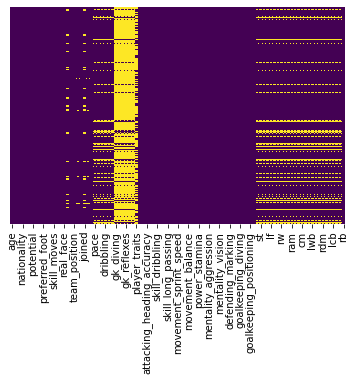

In [204]:
sns.heatmap(df.isnull(),yticklabels= False,cbar =False,cmap ='viridis')

In [198]:
mulcols = ['player_traits','player_positions']